### DATA DESCRIPTION: 

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. 

 RowNumber: Row Numbers from 1 to 10000 

 CustomerId: Unique Ids for bank customer identification 

 Surname: Customer's last name 

 CreditScore: Credit score of the customer 

 Geography: The country from which the customer belongs 

 Gender: Male or Female 

 Age: Age of the customer 

 Tenure: Number of years for which the customer has been with the bank 

 Balance: Bank balance of the customer 

 NumOfProducts: Number of bank products the customer is utilising 

 HasCrCard: Binary Flag for whether the customer holds a credit card with the bank or not 

 IsActiveMember: Binary Flag for whether the customer is an active member with the bank or not 

 EstimatedSalary: Estimated salary of the customer in Dollars 

 Exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained 

 > Target Column Description: Exited is a class label used to divide into groups (customer closed account or not). 
 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns=None

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier , StackingClassifier
from xgboost import XGBClassifier

from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, cohen_kappa_score
from sklearn.metrics import precision_score, recall_score

### Read the data:

In [2]:
df = pd.read_csv('Churn.csv')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Understanding:

In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# data type conversion:
df['HasCrCard'] = df['HasCrCard'].astype(object)
df['IsActiveMember'] = df['IsActiveMember'].astype(object)
df['NumOfProducts'] = df['NumOfProducts'].astype(object)

In [6]:
df_num = df.select_dtypes(np.number)
df_cat = df.select_dtypes(object)

print('number of continuous columns: ',len(df_num.columns))
print('number of categorical columns: ',len(df_cat.columns))
print('\n')
print('continuous columns: ',(df_num.columns))
print('categorical columns: ',(df_cat.columns))

number of continuous columns:  8
number of categorical columns:  6


continuous columns:  Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'EstimatedSalary', 'Exited'],
      dtype='object')
categorical columns:  Index(['Surname', 'Geography', 'Gender', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember'],
      dtype='object')


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [8]:
df.describe(include=object).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457
NumOfProducts,10000,4,1,5084
HasCrCard,10000,2,1,7055
IsActiveMember,10000,2,1,5151


In [9]:
print('% Values in each categorical columns')
for i in df_cat.columns:
    print('\n% Values in column ',i)
    print((df[i].value_counts()/len(df[i])*100))

% Values in each categorical columns

% Values in column  Surname
Smith         0.32
Scott         0.29
Martin        0.29
Walker        0.28
Brown         0.26
              ... 
Spears        0.01
Ruth          0.01
Sharwood      0.01
Macgroarty    0.01
Overby        0.01
Name: Surname, Length: 2932, dtype: float64

% Values in column  Geography
France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

% Values in column  Gender
Male      54.57
Female    45.43
Name: Gender, dtype: float64

% Values in column  NumOfProducts
1    50.84
2    45.90
3     2.66
4     0.60
Name: NumOfProducts, dtype: float64

% Values in column  HasCrCard
1    70.55
0    29.45
Name: HasCrCard, dtype: float64

% Values in column  IsActiveMember
1    51.51
0    48.49
Name: IsActiveMember, dtype: float64


##### Missing Values:

In [10]:
count = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/len(df)*100).sort_values(ascending=False)
missing = pd.concat([count,percent],axis=1, keys=['count','percent'])
missing.sort_values(by='percent', ascending=False)

,count,percent
Exited,0,0.0
EstimatedSalary,0,0.0
IsActiveMember,0,0.0
HasCrCard,0,0.0
NumOfProducts,0,0.0
Balance,0,0.0
Tenure,0,0.0
Age,0,0.0
Gender,0,0.0
Geography,0,0.0


<AxesSubplot:>

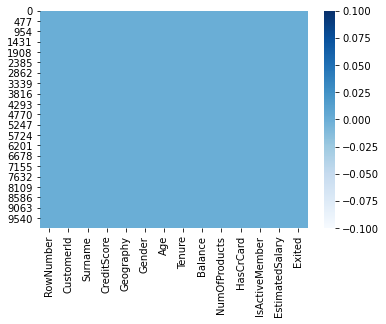

In [11]:
sns.heatmap(df.isnull(),cmap="Blues")

##### Outlier Analysis:

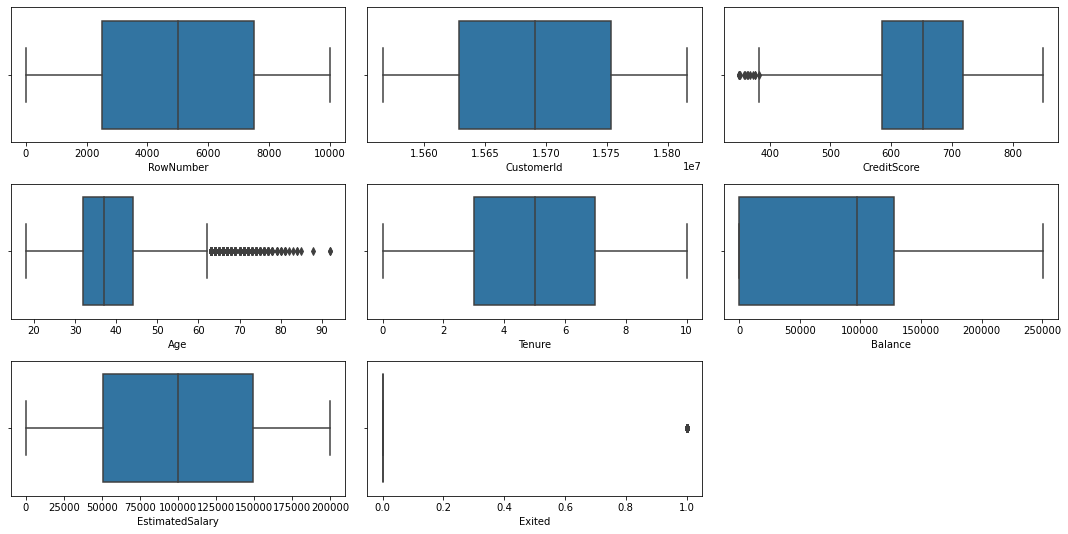

In [12]:
plt.figure(figsize=(15,12))
j = 1
for i in df_num.columns:
    plt.subplot(5,3,j)
    sns.boxplot(df_num[i])
    j+=1
    
plt.tight_layout()
plt.show()

##### Skewness:

In [13]:
df.skew().sort_values(ascending= False)

Exited             1.471611
Age                1.011320
NumOfProducts      0.745568
Tenure             0.010991
EstimatedSalary    0.002085
CustomerId         0.001149
RowNumber          0.000000
IsActiveMember    -0.060437
CreditScore       -0.071607
Balance           -0.141109
HasCrCard         -0.901812
dtype: float64

##### Class Balance in Target:

In [14]:
df['Exited'].value_counts(normalize=True)*100

0    79.63
1    20.37
Name: Exited, dtype: float64

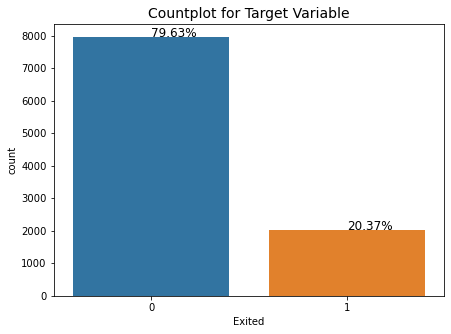

In [15]:
plt.figure(figsize=(7,5))
sns.countplot(df['Exited']);
plt.text(x=0, y=df['Exited'].value_counts()[0]+1, s='79.63%', size=12);
plt.text(x=1, y=df['Exited'].value_counts()[1]+1, s='20.37%', size=12);
plt.title('Countplot for Target Variable', size=14);

In [16]:
# 80:20 ratio implies class imbalance.
# target is not evenly distributed. generally 70:30 split implies balance of classes.
# it cannot be called as a defect. More data might be able to give clear idea able the minority class.
# in order to treat this imbalance, over or under sampling techniques can be used.
# Synthetic Minority Oversampling Technique(SMOTE) can be done to generalize the target. 

### Data Cleaning & EDA:

In [17]:
# dropping insignificant columns:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace= True)

In [18]:
df_num = df.select_dtypes(np.number)
df_cat = df.select_dtypes(object)

print('number of continuous columns: ',len(df_num.columns))
print('number of categorical columns: ',len(df_cat.columns))

number of continuous columns:  6
number of categorical columns:  5


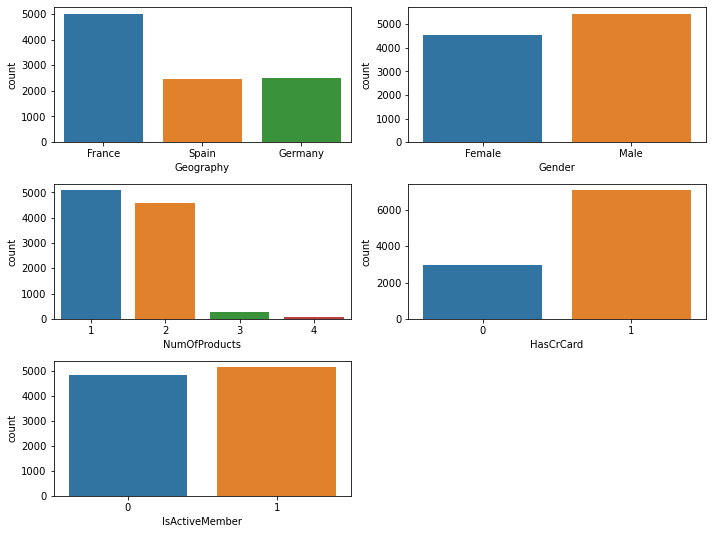

In [19]:
# categorical plots
plt.figure(figsize=(10,12))
j = 1
for i in df_cat.columns:
    plt.subplot(5,2,j)
    sns.countplot(df_cat[i])
    j+=1
    
plt.tight_layout()
plt.show()

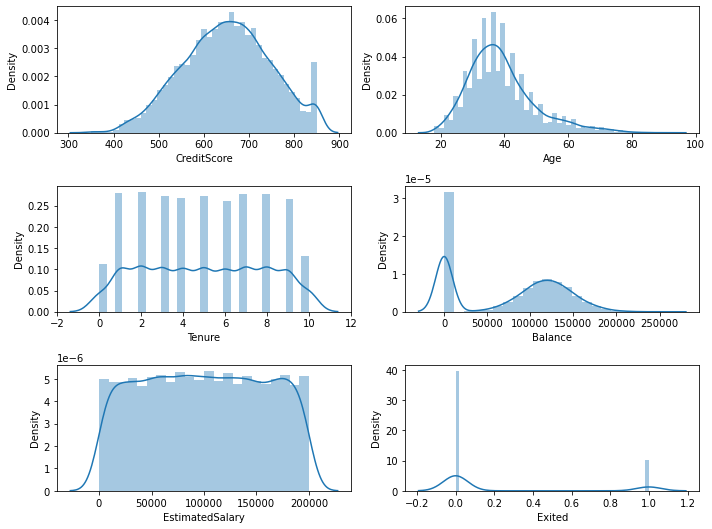

In [20]:
# numerical plots
plt.figure(figsize=(10,12))
j = 1
for i in df_num.columns:
    plt.subplot(5,2,j)
    sns.distplot(df_num[i])
    j+=1
    
plt.tight_layout()
plt.show()

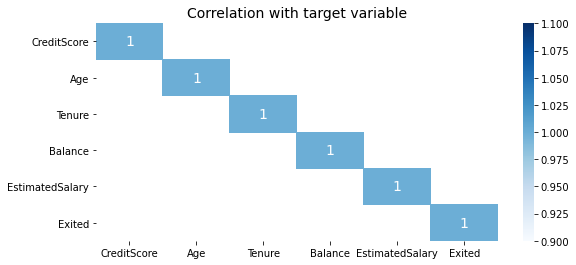

In [21]:
# variables most correlated with Target:
plt.figure(figsize=(9,4))
sns.heatmap(df.corr()[np.abs(df.corr())>0.6], annot = True, annot_kws={'size':14}, cmap='Blues');
plt.title('Correlation with target variable', size=14);

<Figure size 1224x1008 with 0 Axes>

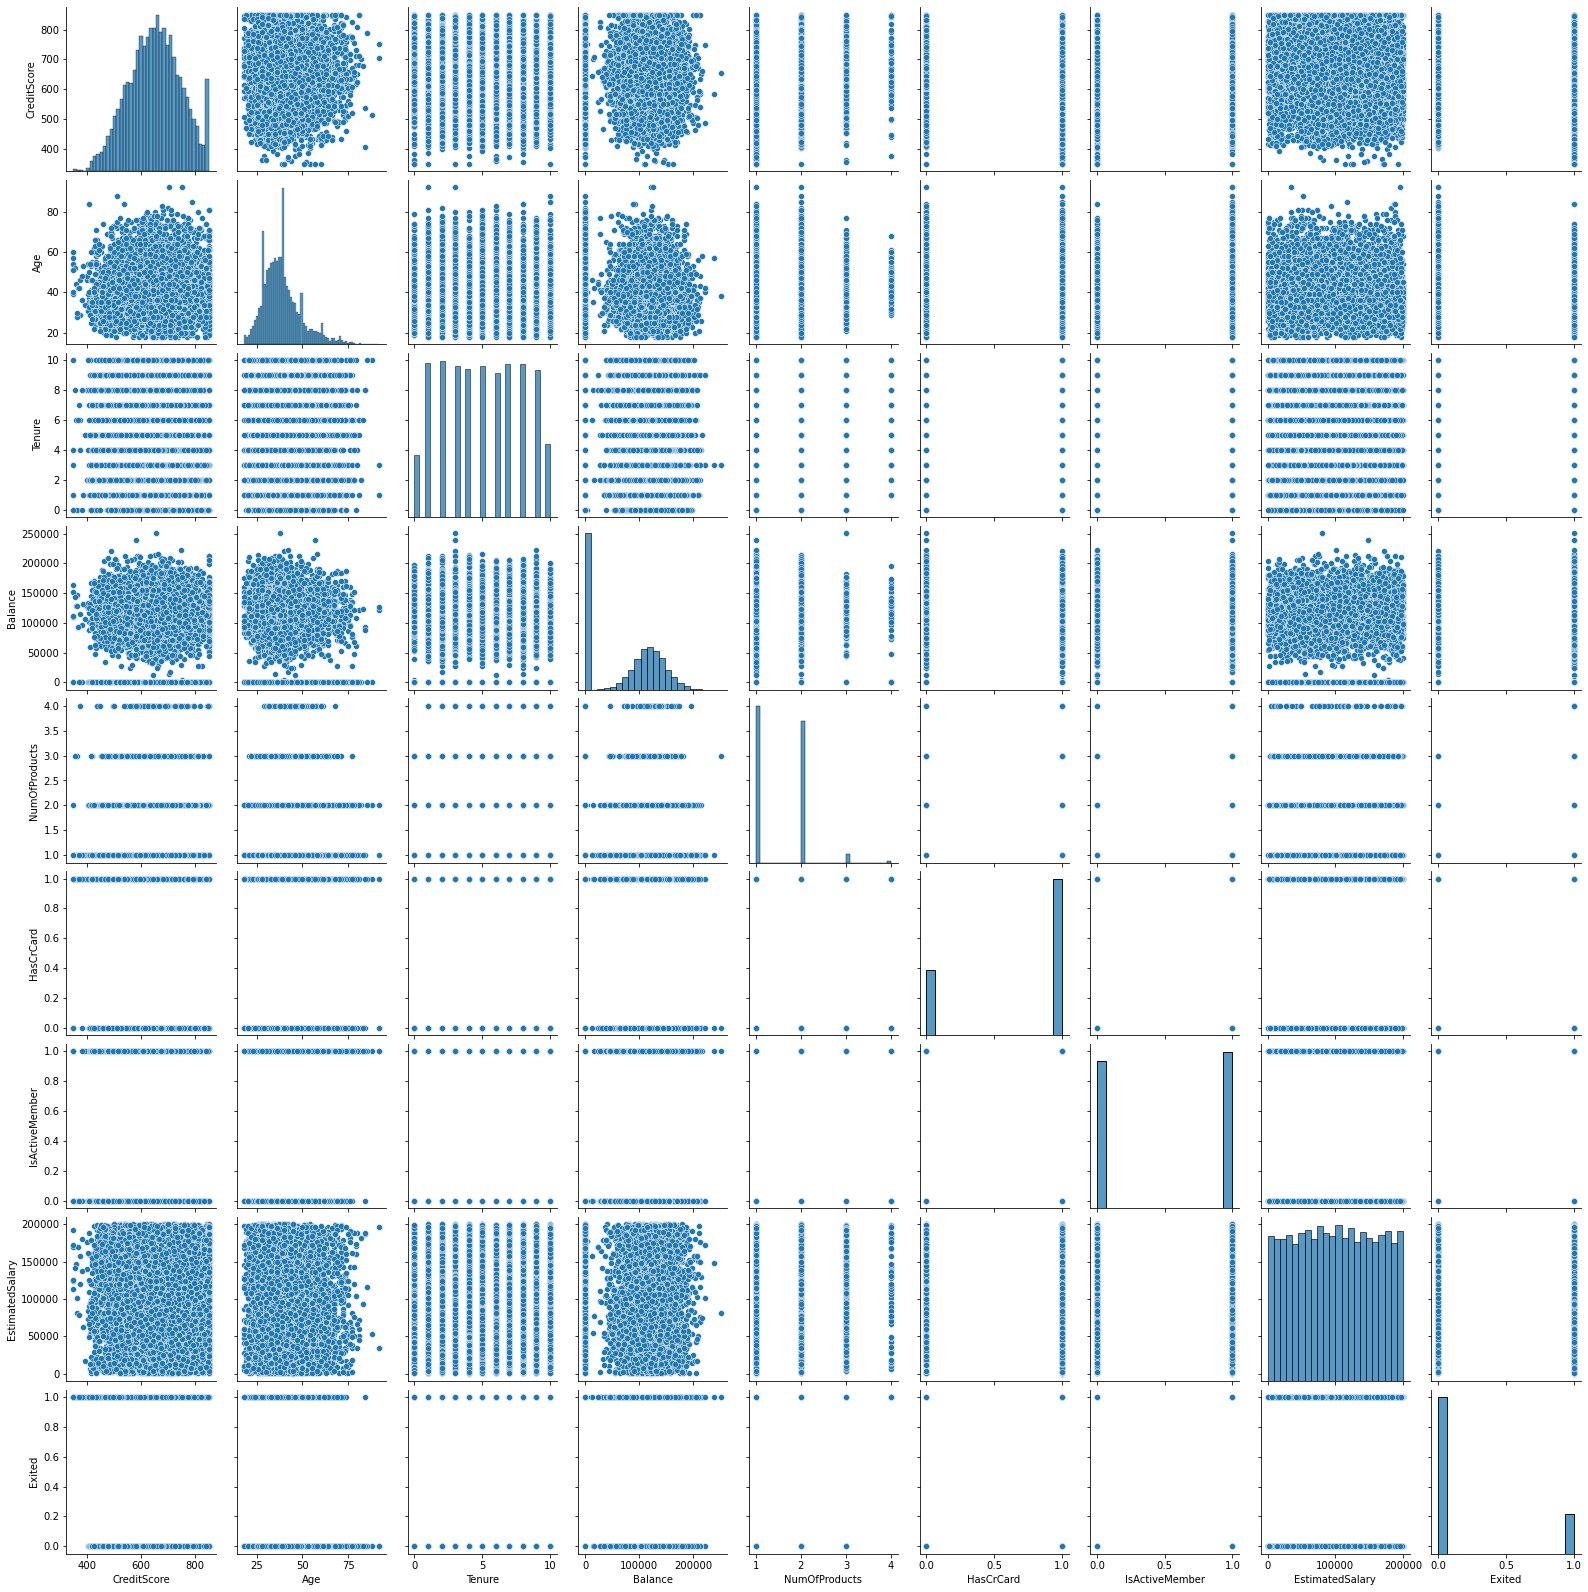

In [22]:
plt.figure(figsize=(17,14))
sns.pairplot(df)

##### Analysing numerical columns with target variable:

In [23]:
df_num.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Exited'], dtype='object')

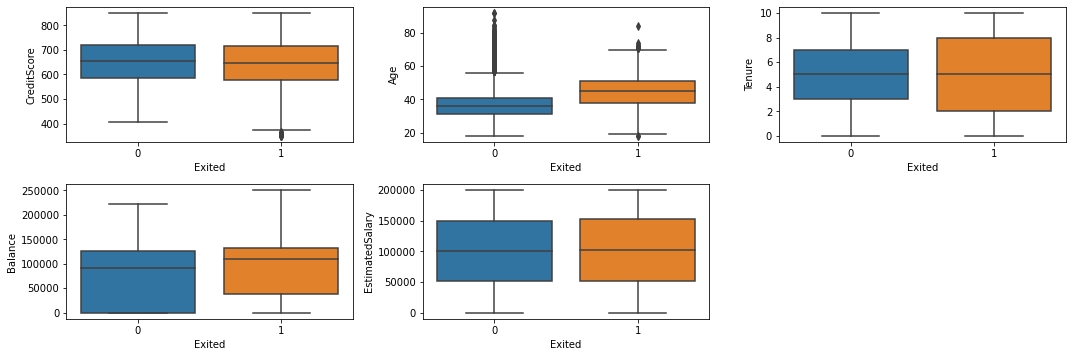

In [24]:
plt.figure(figsize=(15,12))
j = 1
for i in df_num.drop('Exited', axis=1).columns:
    plt.subplot(5,3,j)
    sns.boxplot(df['Exited'], df_num[i])
    j+=1
    
plt.tight_layout()
plt.show()

##### Analysing categorical variabel with target columns:

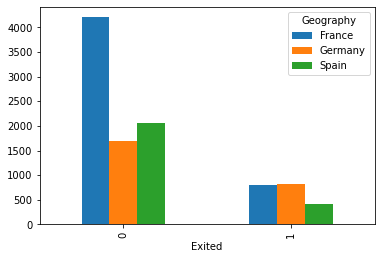

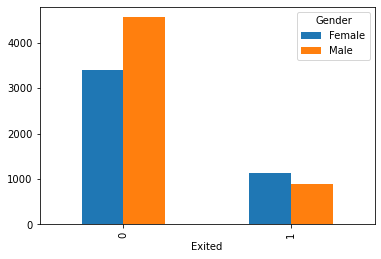

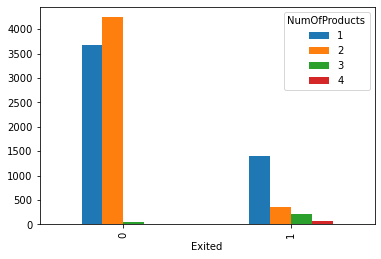

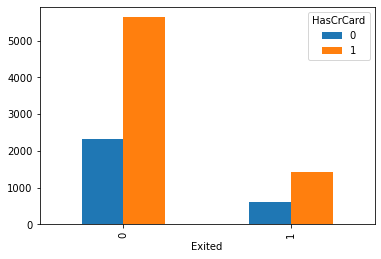

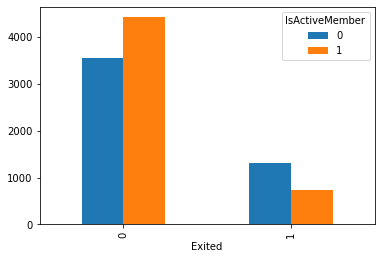

In [25]:
for i in df_cat.columns:
    pd.crosstab(df['Exited'], df[i]).plot(kind='bar')

### Statistical tests:  

Categorical:

In [26]:
from scipy import stats

In [27]:
Test_results =[]
for i in df_cat:
    p_value = stats.chi2_contingency(observed=pd.crosstab(df_cat[i],df['Exited']).values,correction=False)[1]
    Test_results.append(p_value)
       
Results = pd.DataFrame({'Features':df_cat.columns ,'P value':Test_results})

Results

,Features,P value
0,Geography,3.830318e-66
1,Gender,1.720415e-26
2,NumOfProducts,0.000000e+00
3,HasCrCard,4.753654e-01
4,IsActiveMember,5.953853e-55


Shapiro:

In [28]:
pval=[]
for i in df_num:
    stat, p_value = stats.shapiro(df_num[i])
    pval.append(p_value)
    
Results = pd.DataFrame({'Features':df_num.columns ,'P value':pval})
Results

,Features,P value
0,CreditScore,3.493484e-20
1,Age,0.000000e+00
2,Tenure,0.000000e+00
3,Balance,0.000000e+00
4,EstimatedSalary,0.000000e+00
5,Exited,0.000000e+00


Numerical:

In [29]:
Test_results =[]
for i in df_num:
    gr_1 = df_num[df_num['Exited']==0][i]
    gr_2 = df_num[df_num['Exited']==1][i]
    p_value = stats.kruskal(gr_1,gr_2)[1]
    Test_results.append(p_value)
      
Results = pd.DataFrame({'Features':df_num.columns ,'P value':Test_results})

Results

,Features,P value
0,CreditScore,1.986843e-02
1,Age,3.209954e-230
2,Tenure,1.621925e-01
3,Balance,1.115785e-28
4,EstimatedSalary,2.270499e-01
5,Exited,0.000000e+00


In [30]:
feature = df.drop('Exited', axis=1)
target = df['Exited']

df_num = feature.select_dtypes(np.number)
df_cat = feature.select_dtypes(object)

# dummy encoding:
encode =  pd.get_dummies(df_cat, drop_first = True)

# scaling the data:
from sklearn.preprocessing  import StandardScaler
ss = StandardScaler()

x_sc = pd.DataFrame(ss.fit_transform(df_num), columns = df_num.columns)

X = pd.concat([x_sc, encode], axis=1)
y = target

# smote to treat class imbalance:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=11, sampling_strategy=0.5)
X,y = smote.fit_resample(X,y)

X.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1
0,-0.326221,0.293517,-1.041760,-1.225848,0.021886,0,0,0,0,0,0,1,1
1,-0.440036,0.198164,-1.387538,0.117350,0.216534,0,1,0,0,0,0,0,1
2,-1.536794,0.293517,1.032908,1.333053,0.240687,0,0,0,0,1,0,1,0
3,0.501521,0.007457,-1.387538,-1.225848,-0.108918,0,0,0,1,0,0,0,0
4,2.063884,0.388871,-1.041760,0.785728,-0.365276,0,1,0,0,0,0,1,1


In [31]:
y.value_counts(normalize=True)

0    0.666695
1    0.333305
Name: Exited, dtype: float64

### Train & Test Split:

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (8360, 13)
y_train shape:  (8360,)
X_test shape:  (3584, 13)
y_test shape:  (3584,)


##### Statistical Significance:

In [33]:
from scipy import stats
var = 0
for i in range(13):
    if stats.ttest_ind(X_train.iloc[:,i],X_test.iloc[:,i])[1] < 0.05:
        var = var+1
        print('there is strong variation in: ', X_train.columns[i])
if var ==0:
    print('X test and X train have similar type of data')

there is strong variation in:  IsActiveMember_1


In [34]:
for i in range(1):
    if stats.ttest_ind(y_train,y_test)[1] > 0.05:
         print('y test and y train have similar type of data')
    else:
        print('there is strong variation')

there is strong variation


### Model Building:

##### Necessary User Defined functions:

In [35]:
def get_train_report(model): 
    y_train_pred = model.predict(X_train)
    print(classification_report(y_train, y_train_pred))

In [36]:
def get_test_report(model): 
    y_test_pred = model.predict(X_test)
    print(classification_report(y_test, y_test_pred))

In [37]:
def plot_cm_test(model):
    y_test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)
    conf_matrix = pd.DataFrame(data = cm, columns = ['predicted:0','predicted:1'], index = ['actual:0','actual:1'])
    sns.heatmap(conf_matrix, annot=True, fmt ='d')
    plt.show()

In [38]:
def plot_roc_test(model):
    y_test_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, th = roc_curve(y_test, y_test_pred_proba)
    plt.plot(fpr,tpr)
    plt.plot([[0,0],[1,1]], '--', color='r')
    plt.xlabel('FPR', size=13)
    plt.ylabel('TPR', size=13)
    plt.title('ROC')
    print('roc auc score: ', roc_auc_score(y_test, y_test_pred_proba))
    plt.show()

##### Reason of selecting model:
1. On observing the pairplot, it can be seen that there in no linear relationship between some of the attributes.
2. The target variable is binary classifier.
3. Logistic regression works well with binary classification. But it will give good results when there is linear relationship between the attributes only. Also there are outliers in 'Age' and 'Credit score'. In distance based algorithms, outliers will affect the performance of the models. So it will not be feasible to use Logistic regression and KNN. Also the dataset doesnot have correlation between the attributes. 
4. As the dataset has both continuous and categorical columns and with the presence of outliers, **decision tree** algorithm is a good selection for this dataset.
5. For non linear relationship in dataset, decision tree will perform very well and is also does not have any underlying assumptions.

In [39]:
# base model using decision tree classifier:
dt1 = DecisionTreeClassifier(random_state=10)
dt_default = dt1.fit(X_train,y_train)

y_train_pred = dt_default.predict(X_train)
y_test_pred = dt_default.predict(X_test)

In [41]:
# accuracy for train:
accuracy_score(y_train, y_train_pred)

1.0

In [42]:
# accuracy for test:
accuracy_score(y_test, y_test_pred)

0.7965959821428571

In [ ]:
# generally a fully grown decision will tend to overfit. 
# the model test performance with 79% is not good.

In [43]:
cohen_kappa_score(y_test, y_test_pred)

0.5347400691781251

In [ ]:
# As the kappa score for the full model is 0.53, we can say that there is moderate substantial agreement 
# between the actual and predicted values. 

##### Model Evaluation:

In [44]:
# train evaluation:
get_train_report(dt_default)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5515
           1       1.00      1.00      1.00      2845

    accuracy                           1.00      8360
   macro avg       1.00      1.00      1.00      8360
weighted avg       1.00      1.00      1.00      8360



In [ ]:
# In train data, all the precision, recall and f1 score is at 100%. 
# Train data performance is very high.

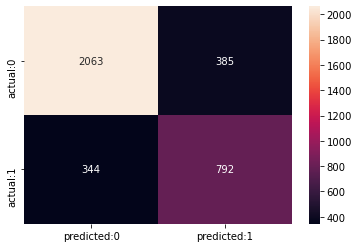

In [45]:
# confusion matrix for test data:
plot_cm_test(dt_default)

In [46]:
y_test_pred_proba = dt_default.predict_proba(X_test)[:,1]

roc auc score:  0.769955928380742


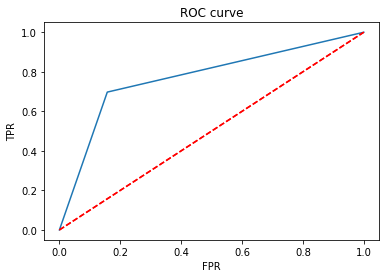

In [47]:
fpr, tpr, th = roc_curve(y_test,y_test_pred_proba);
plt.plot(fpr,tpr);
plt.plot([[0,0],[1,1]], '--', color='r');
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
print('roc auc score: ',roc_auc_score(y_test,y_test_pred_proba))
plt.show()

In [48]:
# test evaluation:
get_test_report(dt_default)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2448
           1       0.67      0.70      0.68      1136

    accuracy                           0.80      3584
   macro avg       0.76      0.77      0.77      3584
weighted avg       0.80      0.80      0.80      3584



In [ ]:
# In test data, False Negative is sensitive as students who are actually placed are predicted as not placed.
# This will reduce the placement success rate for the organization.
# So recall of 1 (sensitivity) has to be increased.
# ROC AUC score of 77% is not good.
# the model can be optimized by doing gridsearch.

##### Important Features:

In [49]:
imp = pd.DataFrame({'Features':X_train.columns,'Importance':dt_default.feature_importances_})
imp = imp.sort_values(by='Importance',ascending = False)
imp

,Features,Importance
1,Age,0.290996
3,Balance,0.135737
4,EstimatedSalary,0.118828
8,NumOfProducts_2,0.117909
0,CreditScore,0.113117
2,Tenure,0.085218
12,IsActiveMember_1,0.050122
7,Gender_Male,0.021179
5,Geography_Germany,0.020136
9,NumOfProducts_3,0.018529


In [50]:
score = cross_val_score(dt_default, X_train, y_train, cv=5, scoring='f1_weighted')

print('scores: ', score)
print('avg of roc_auc: ',score.mean())
print('\n')
print('bias error: ', 1-np.mean(score))
print('variance error: ', np.std(score)/np.mean(score))

scores:  [0.77802775 0.7830106  0.79294938 0.7942721  0.77383967]
avg of roc_auc:  0.7844199006001566


bias error:  0.21558009939984335
variance error:  0.010271737816329616


### Model Fine Tuning:

In [ ]:
# in order to improve the model, we can use max depth and also check the optimal criterion to evaluate impurity 
# by using gridsearch.
# if still the model is not improving, we can go ahead and do random forest which uses bagging technique.

In [51]:
from sklearn.model_selection import GridSearchCV

In [97]:
tune_params = {'criterion': ['entropy','gini'],
              'max_depth': range(2,10),
                'max_features': ["sqrt", "log2"],
              'min_samples_split': range(2,10),
              'min_samples_leaf': range(2,10)}

dt2 = DecisionTreeClassifier(random_state=10)
grid = GridSearchCV(estimator= dt2, param_grid= tune_params, cv=5, scoring= 'accuracy')
dt_grid_model = grid.fit(X_train,y_train)

dt_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 2}

##### Tuned Decision Tree:

In [52]:
dt_tuned = DecisionTreeClassifier(criterion= 'entropy',  max_depth=7, max_features= 'log2',
                                  min_samples_leaf=7, min_samples_split=5)

dt_tuned_model = dt_tuned.fit(X_train, y_train)

y_train_pred = dt_tuned_model.predict(X_train)
y_test_pred = dt_tuned_model.predict(X_test)

In [53]:
# train evaluation:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      5515
           1       0.76      0.62      0.68      2845

    accuracy                           0.80      8360
   macro avg       0.79      0.76      0.77      8360
weighted avg       0.80      0.80      0.80      8360



In [ ]:
# In train data, all the precision1 is 76% and recall1 is 62%.
# Train data performance for f1 score is less.

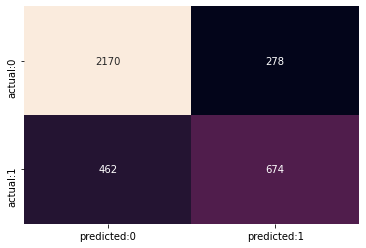

In [55]:
# confusion matrix for test data:
cm = confusion_matrix(y_test, y_test_pred)
conf_matrix = pd.DataFrame(data = cm, columns = ['predicted:0','predicted:1'], index = ['actual:0','actual:1'])
sns.heatmap(conf_matrix, annot=True, cbar=False, fmt ='d')
plt.show()

In [56]:
# test evaluation:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      2448
           1       0.71      0.59      0.65      1136

    accuracy                           0.79      3584
   macro avg       0.77      0.74      0.75      3584
weighted avg       0.79      0.79      0.79      3584



In [ ]:
# Overall weighted f1 score has reduced by 1% when compared to default model.
# So recall of 1 (sensitivity) has reduced to 59%.

##### Important Features:

In [57]:
imp = pd.DataFrame({'variable': X.columns, 'importance':dt_tuned_model.feature_importances_})
imp.sort_values(by='importance', ascending=False)

,variable,importance
1,Age,0.388355
8,NumOfProducts_2,0.182221
5,Geography_Germany,0.098673
9,NumOfProducts_3,0.092238
12,IsActiveMember_1,0.087472
7,Gender_Male,0.036984
3,Balance,0.035317
10,NumOfProducts_4,0.031751
2,Tenure,0.019834
0,CreditScore,0.015341


In [ ]:
# age and NumOfProducts_2 are majorly contributing the model.

##### Decision Tree with 2 best features:

In [58]:
dt3 = DecisionTreeClassifier()
dt_imp = dt3.fit(X_train[['Age','NumOfProducts_2']], y_train)

y_test_pred = dt_imp.predict(X_test[['Age','NumOfProducts_2']])

In [59]:
# test evaluation:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2448
           1       0.83      0.65      0.73      1136

    accuracy                           0.85      3584
   macro avg       0.84      0.79      0.81      3584
weighted avg       0.84      0.85      0.84      3584



In [ ]:
# the model performance has increased with importance features alone

##### Random Forest:

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [61]:
# test evaluation:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2448
           1       0.82      0.73      0.78      1136

    accuracy                           0.86      3584
   macro avg       0.85      0.83      0.84      3584
weighted avg       0.86      0.86      0.86      3584



In [103]:
tune = {'criterion' : ['entropy', 'gini'],
        'n_estimators' : [90, 100, 150, 200],
        'max_depth' : [10, 15, 20],
        'min_samples_split' : [2, 5, 8]}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, param_grid= tune, cv=5, scoring ='accuracy')

rf_model_grid = rf_grid.fit(X_train,y_train)

print('Best parameters for random forest classifier: ', rf_model_grid.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 90} 



##### Tuned Random Forest:

In [62]:
rf_tuned = RandomForestClassifier(n_estimators =90 ,criterion= 'entropy',  max_depth=20, min_samples_split=2)

rf_tuned_model = rf_tuned.fit(X_train, y_train)

y_train_pred = rf_tuned_model.predict(X_train)
y_test_pred = rf_tuned_model.predict(X_test)

In [63]:
# train evaluation:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5515
           1       1.00      1.00      1.00      2845

    accuracy                           1.00      8360
   macro avg       1.00      1.00      1.00      8360
weighted avg       1.00      1.00      1.00      8360



In [ ]:
# In train data, there is overfitting.

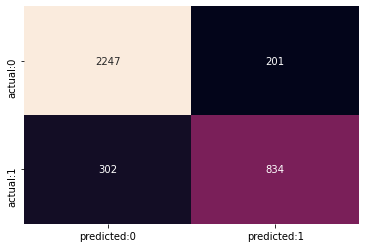

In [64]:
# confusion matrix for test data:
cm = confusion_matrix(y_test, y_test_pred)
conf_matrix = pd.DataFrame(data = cm, columns = ['predicted:0','predicted:1'], index = ['actual:0','actual:1'])
sns.heatmap(conf_matrix, annot=True, cbar=False, fmt ='d')
plt.show()

In [65]:
# test evaluation:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2448
           1       0.81      0.73      0.77      1136

    accuracy                           0.86      3584
   macro avg       0.84      0.83      0.83      3584
weighted avg       0.86      0.86      0.86      3584



In [ ]:
# Overall weighted f1 score has increased by 6% when compared to default model.
# So recall of 1 (sensitivity) has improved significantly.
# But recall is sensitive here and it can be improved more.

In [66]:
score = cross_val_score(rf_tuned_model, X_train, y_train, cv=5, scoring='roc_auc')

print('scores: ', score)
print('avg of roc_auc: ',score.mean())
print('\n')
print('bias error: ', 1-np.mean(score))
print('variance error: ', np.std(score)/np.mean(score))

scores:  [0.8997414  0.91409194 0.92630659 0.91634574 0.90752732]
avg of roc_auc:  0.9128025978040398


bias error:  0.08719740219596017
variance error:  0.00973722733789707


In [67]:
y_test_pred_proba = rf_tuned_model.predict_proba(X_test)[:,1]

roc auc score:  0.9212527257088281


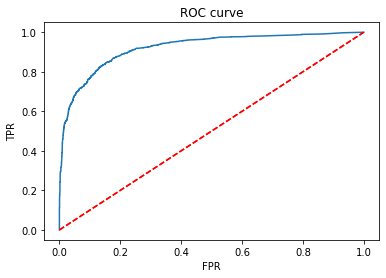

In [68]:
fpr, tpr, th = roc_curve(y_test,y_test_pred_proba);
plt.plot(fpr,tpr);
plt.plot([[0,0],[1,1]], '--', color='r');
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
print('roc auc score: ',roc_auc_score(y_test,y_test_pred_proba))
plt.show()

In [69]:
imp = pd.DataFrame({'variable': X.columns, 'importance':rf_tuned_model.feature_importances_})
imp = imp.sort_values(by='importance', ascending=False)

Text(0, 0.5, 'Features')

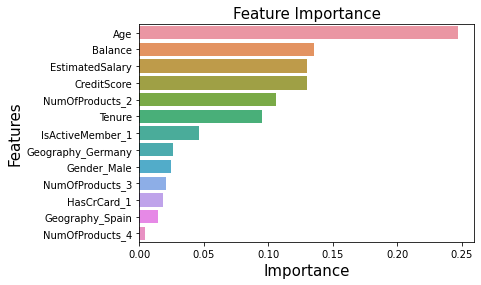

In [70]:
sns.barplot(x = 'importance', y = 'variable', data = imp)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

In [ ]:
# even after fitting the model with random forest, we can do boosting techiques.

### Boosting Techniques:

##### Adaboost Classifier:

In [71]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada_model = ada.fit(X_train, y_train)

y_train_pred = ada_model.predict(X_train)
y_test_pred = ada_model.predict(X_test)

In [72]:
# test evaluation:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      2448
           1       0.72      0.69      0.70      1136

    accuracy                           0.82      3584
   macro avg       0.79      0.78      0.79      3584
weighted avg       0.81      0.82      0.82      3584



##### Gradient Boost:

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb_model = gb.fit(X_train, y_train)

y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

In [74]:
# test evaluation:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      2448
           1       0.78      0.67      0.72      1136

    accuracy                           0.84      3584
   macro avg       0.82      0.79      0.80      3584
weighted avg       0.83      0.84      0.83      3584



In [ ]:
# gradient boosting is giving 100% accuracy on the test data.

##### XGBoost:

In [75]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb_model = xgb.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

[18:28:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [76]:
# test evaluation:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2448
           1       0.83      0.75      0.79      1136

    accuracy                           0.87      3584
   macro avg       0.86      0.84      0.85      3584
weighted avg       0.87      0.87      0.87      3584



In [ ]:
# even after using booting techniques - adaboost boost, gradient boost and xgboost the model performance is not increasing.
# the default decision tree model is giving higher performance than the other models.